In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif, VarianceThreshold
import sklearn.metrics as metrics

In [114]:
df = pd.read_csv('Data/Pipeline_data_toy.csv', index_col=[0])
df.head()

,bmi,cigs_before_preg,birthweight_g,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,...,infections,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change
0,46.3,0.0,2183.0,1341.0,310.0,27.499772,25.0,64.0,18.0,0.0,...,0.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,40.0
1,25.5,0.0,3280.0,621.0,179.0,19.738769,16.0,65.0,6.0,0.0,...,1.0,0.0,0.0,1.0,6.0,1.0,2.0,0.0,0.0,26.0
2,21.8,0.0,2410.0,741.0,154.0,27.000000,24.0,63.0,15.0,0.0,...,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,31.0
3,22.7,0.0,3544.0,750.0,150.0,31.000000,28.0,62.0,16.0,0.0,...,0.0,0.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,26.0
4,34.0,3.0,2778.0,1423.0,192.0,28.000000,31.0,63.0,8.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0


In [115]:
X = df.drop(['birthweight_g'], axis=1)
y = df['birthweight_g']

* Variance Threshold used to remove features with low variance 

In [116]:
selector = VarianceThreshold(threshold = 0.2)
X_new = selector.fit_transform(X)

In [117]:
X_new.shape

(10000, 29)

In [118]:
X.columns

Index(['bmi', 'cigs_before_preg', 'birth_time', 'm_deliveryweight', 'f_age',
       'm_age', 'm_height_in', 'num_prenatal_visits', 'prior_births_dead',
       'prior_births_living', 'prior_terminations', 'prepreg_weight',
       'num_prev_cesareans', 'time_since_menses', 'birth_attendant',
       'birth_place', 'birth_mn', 'birth_dy', 'f_education', 'f_hispanic',
       'f_race6', 'gonorrhea', 'labour_induced', 'm_nativity', 'm_education',
       'm_hispanic', 'admit_icu', 'm_race6', 'm_transferred', 'infections',
       'm_morbidity', 'riskf', 'payment', 'mn_prenatalcare_began',
       'delivery_method', 'res_status', 'prev_cesarean', 'infant_sex',
       'weight_change'],
      dtype='object')

In [119]:
features = X.columns
features[selector.get_support()]

Index(['bmi', 'cigs_before_preg', 'birth_time', 'm_deliveryweight', 'f_age',
       'm_age', 'm_height_in', 'num_prenatal_visits', 'prior_births_living',
       'prior_terminations', 'prepreg_weight', 'num_prev_cesareans',
       'time_since_menses', 'birth_attendant', 'birth_mn', 'birth_dy',
       'f_education', 'f_hispanic', 'f_race6', 'm_education', 'm_hispanic',
       'm_race6', 'riskf', 'payment', 'mn_prenatalcare_began',
       'delivery_method', 'res_status', 'infant_sex', 'weight_change'],
      dtype='object')

* Feature selection

In [120]:
fs = SelectKBest(score_func=mutual_info_regression, k=10)
X_new = fs.fit_transform(X, y)

In [121]:
features = X.columns
features[fs.get_support()]

Index(['bmi', 'm_deliveryweight', 'num_prenatal_visits', 'time_since_menses',
       'birth_mn', 'f_education', 'f_race6', 'delivery_method', 'infant_sex',
       'weight_change'],
      dtype='object')

* Trying FeautureSelector module

In [64]:
from feature_selector import FeatureSelector

ModuleNotFoundError: No module named 'feature_selector'

### Linear Regression

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [123]:
num_cols = ('bmi','cigs_before_preg','birth_time','m_deliveryweight','f_age','m_age','m_height_in',
            'num_prenatal_visits','prior_births_dead','prior_births_living','prior_terminations','prepreg_weight',
            'num_prev_cesareans','time_since_menses','weight_change','mn_prenatalcare_began')

bin_cols = ('gonorrhea','labour_induced','admit_icu','m_transferred','infections','m_morbidity','riskf',
            'prev_cesarean','infant_sex')

cat_cols = ('birth_attendant','birth_place','birth_mn','birth_dy','f_education','f_hispanic','f_race6',
                'm_nativity','m_education','m_hispanic','m_race6','payment','delivery_method','res_status')

In [125]:
num_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder())])


preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('num', num_transformer , num_cols),
            ('cat', cat_transformer , cat_cols)
        ])

In [127]:
X_processed = preprocessor.fit_transform(X)

In [128]:
X_processed = pd.DataFrame(X_processed)

In [129]:
X_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,2.810418,-0.230973,0.196021,2.893451,-0.594191,-0.695671,-0.049740,1.641846,-0.083903,-0.885747,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.250946,-0.230973,-0.953470,-0.233957,-1.754119,-2.253880,0.310014,-1.326265,-0.083903,-0.885747,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.795515,-0.230973,-0.761888,-0.830791,-0.668885,-0.868806,-0.409494,0.899818,-0.083903,-0.885747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.663052,-0.230973,-0.747520,-0.926284,-0.071061,-0.176268,-0.769248,1.147161,-0.083903,-0.104459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.000092,0.366727,0.326935,0.076396,-0.519429,0.343135,-0.409494,-0.831580,-0.083903,-0.104459,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.7, random_state=0)

In [131]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
coeff_df = pd.DataFrame(reg.coef_, X_processed.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
0,2.269652e+02
1,-2.016657e+01
2,-3.681336e+00
3,-8.688119e+14
4,3.197351e+01
...,...
109,-1.395000e+02
110,1.503906e-01
111,-1.507500e+02
112,-8.777655e+14


In [133]:
y_pred = reg.predict(X_test)

In [134]:
test_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_vs_pred.head(20)

,Actual,Predicted
9394,2910.0,3137.250
898,2620.0,3193.125
2398,3798.0,3330.500
5906,3320.0,3075.750
2343,3997.0,2872.375
8225,2265.0,2635.125
5506,2587.0,2882.500
6451,3070.0,3340.125
2670,4394.0,3470.000
3497,3033.0,3580.000


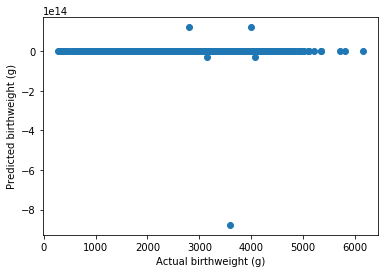

In [135]:
plt.scatter(y_test, y_pred, alpha=1)
plt.xlabel("Actual birthweight (g)")
plt.ylabel("Predicted birthweight (g)")
plt.show()

In [136]:
metrics.mean_absolute_error(y_test, y_pred)

168254799679.18594

* PCA and then re-try

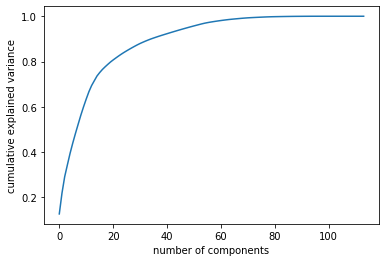

In [143]:
pca = PCA().fit(X_processed)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [154]:
pca = PCA(n_components=30)

X_pca = pca.fit_transform(X_processed)

In [155]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.12671786, 0.09198738, 0.07237383, 0.05214463, 0.05100671,
       0.04549792, 0.04248826, 0.04062978, 0.04007345, 0.03685085,
       0.0345224 , 0.03253371, 0.02703089, 0.0212377 , 0.02093882,
       0.01521537, 0.01355512, 0.01159482, 0.01089929, 0.01043853,
       0.00920673, 0.00870339, 0.00853195, 0.00813975, 0.00764639,
       0.00719734, 0.00697219, 0.00673703, 0.00653496, 0.00629696])

In [156]:
sum(explained_variance)*100

87.3703988902924

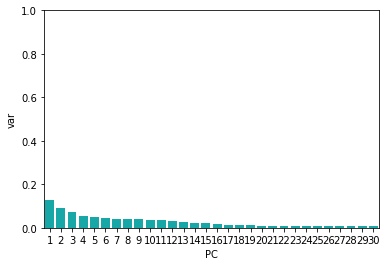

In [164]:
pca_df = pd.DataFrame({'var':explained_variance,
             'PC': range(1,31)})

sns.barplot(x='PC', y="var", data=pca_df, color="c").set(ylim=(0, 1));

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.7, random_state=0)

In [166]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
coeff_df = pd.DataFrame(reg.coef_, columns=['Coefficient'])  
coeff_df

,Coefficient
0,36.723743
1,0.224300
2,88.961176
3,1.394533
4,56.627967
5,-43.766990
6,96.999226
7,11.816699
8,152.178661
9,-10.303002


In [133]:
y_pred = reg.predict(X_test)

In [134]:
test_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_vs_pred.head(20)

,Actual,Predicted
9394,2910.0,3137.250
898,2620.0,3193.125
2398,3798.0,3330.500
5906,3320.0,3075.750
2343,3997.0,2872.375
8225,2265.0,2635.125
5506,2587.0,2882.500
6451,3070.0,3340.125
2670,4394.0,3470.000
3497,3033.0,3580.000


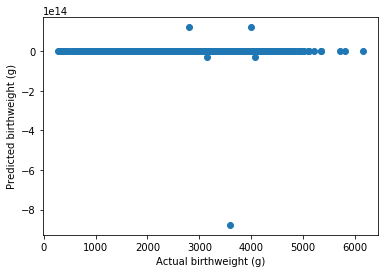

In [135]:
plt.scatter(y_test, y_pred, alpha=1)
plt.xlabel("Actual birthweight (g)")
plt.ylabel("Predicted birthweight (g)")
plt.show()

In [136]:
metrics.mean_absolute_error(y_test, y_pred)

168254799679.18594